# Exploratory data analysis of original abalone dataset

<a href=(https://archive.ics.uci.edu/dataset/1/abalone>Data Source Link Here</a>

In this notebook we investigate the original abalone dataset, in particular the differences with the kaggle abalone dataset

### Summary
 - Kaggle dataset is much larger than the original (90K observations vs 4K)
 
 - Linear correlations between columns are similar in the two datasetets. The biggest difference is in the Height and Rings columns
 
 - While the average pysical measurement (length , height, etc) decreases (up to 5 Rings) in the kaggle dataset, this is not the case in the original
 
 - The range of values per sex in the original dataset is more limited. For example, the minimum Rings number observed in females and males is 5 and 3, respectively (they are both 1 in the kaggle dataset). On the other hand the maximum number of Rings observed in Infants is 21 (it is 29 in the kaggle data set).

**Content:**
1. Data evaluation and treatment
2. Summary statistics and feature distributions
3. Linear Correlation
4. Target-Feature Relationships
5. Feature difference between sexes
6. Target Distribution
7. Conclusions

#### Import Libraries and Data

In [1]:
# Data exploration and manipulation
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#the code in this cell downloads the Original Abalone Dataset - the code was found at https://archive.ics.uci.edu/dataset/1/abalone

# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# # metadata 
# print(abalone.metadata) 
  
# # variable information 
# print(abalone.variables) 

In [3]:
kaggle_df = pd.read_csv('scratch_data/playground-series-s4e4/train.csv', index_col = 'id')
original_df = X.merge(y, right_index = True, left_index = True)

#### 1. Data evaluation and treatment

In [4]:
kaggle_df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


In [5]:
original_df.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [6]:
# I'll rename the columns so the two dataframes have the same columns
kaggle_df.columns = original_df.columns

In [7]:
print(kaggle_df.info())
print(original_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole_weight    90615 non-null  float64
 5   Shucked_weight  90615 non-null  float64
 6   Viscera_weight  90615 non-null  float64
 7   Shell_weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3  

- only difference is that the kaggle dataset is much larger

In [8]:
# check for duplicates
print(f'Kaggle data. Number of duplicate rows: {kaggle_df.duplicated().sum()}')
print(f'Original data. Number of duplicate rows: {original_df.duplicated().sum()}')

Kaggle data. Number of duplicate rows: 0
Original data. Number of duplicate rows: 0


- **there are no duplicates**

#### 2. Summary statistics and feature distributions

In [9]:
kaggle_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
original_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


datasets have very similar summary statistics idicating simlar distributions. This can be confirmed visually in the plots below

In [11]:
kaggle_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

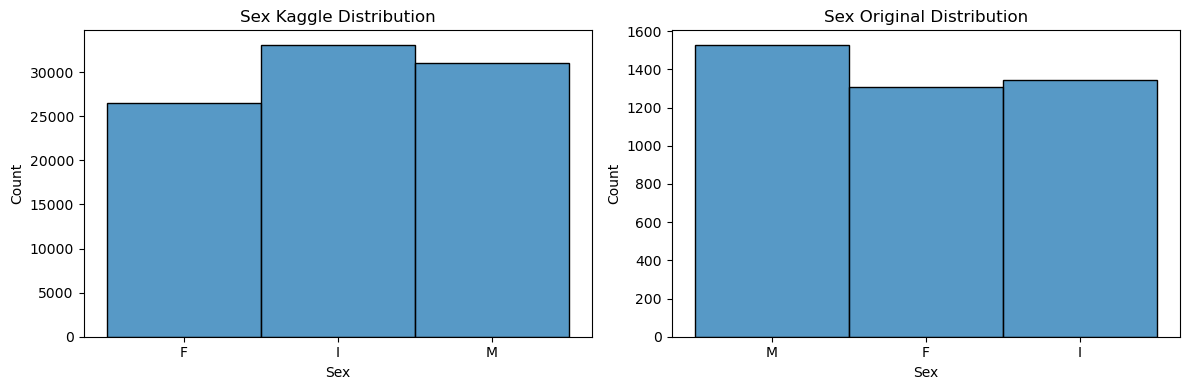

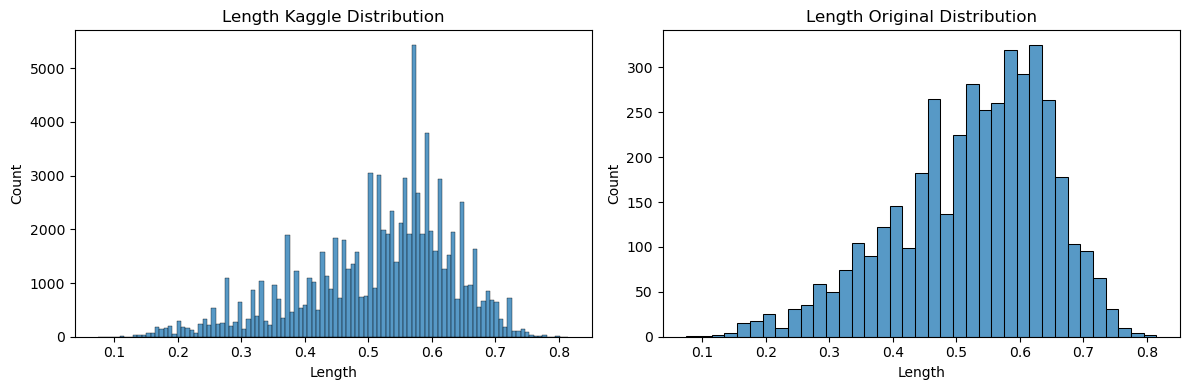

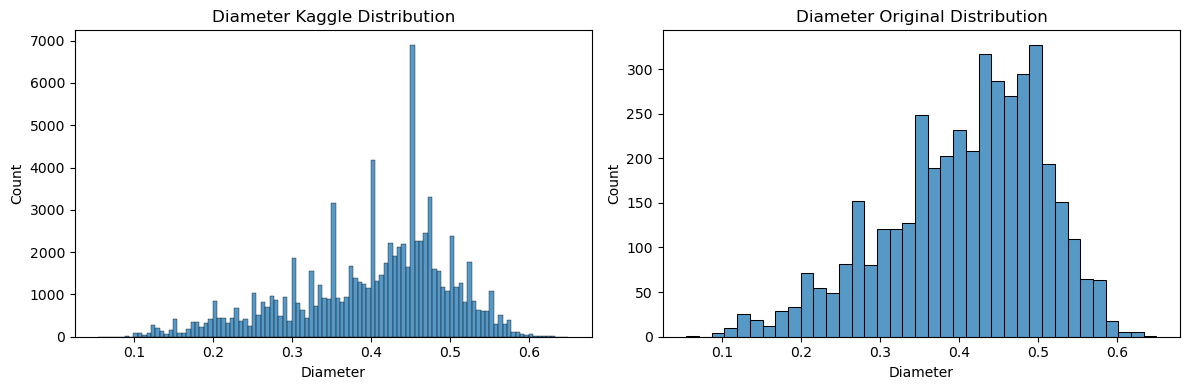

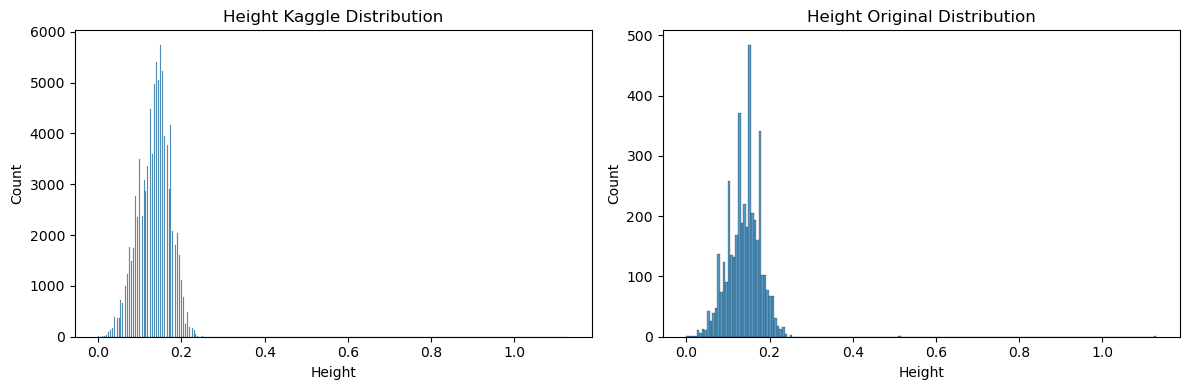

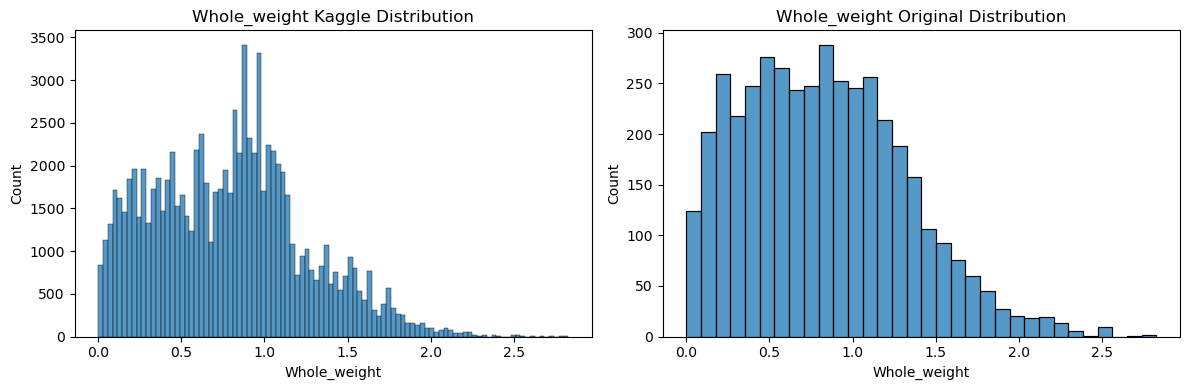

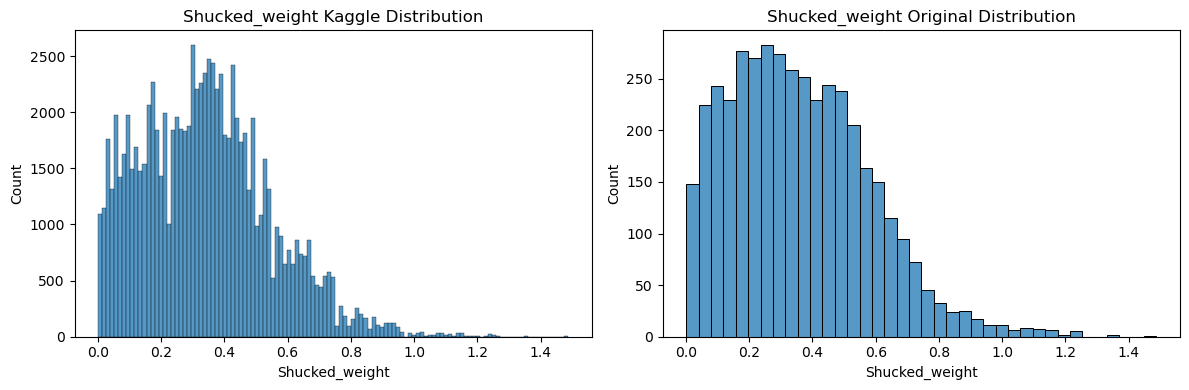

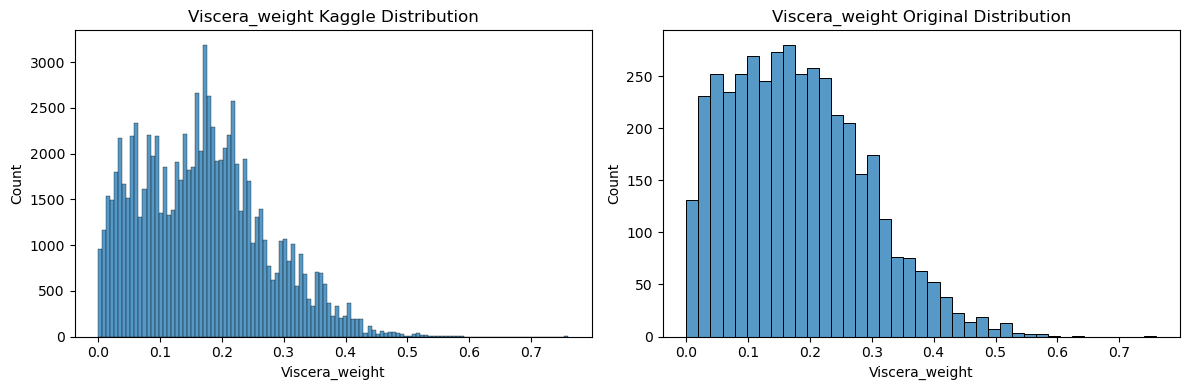

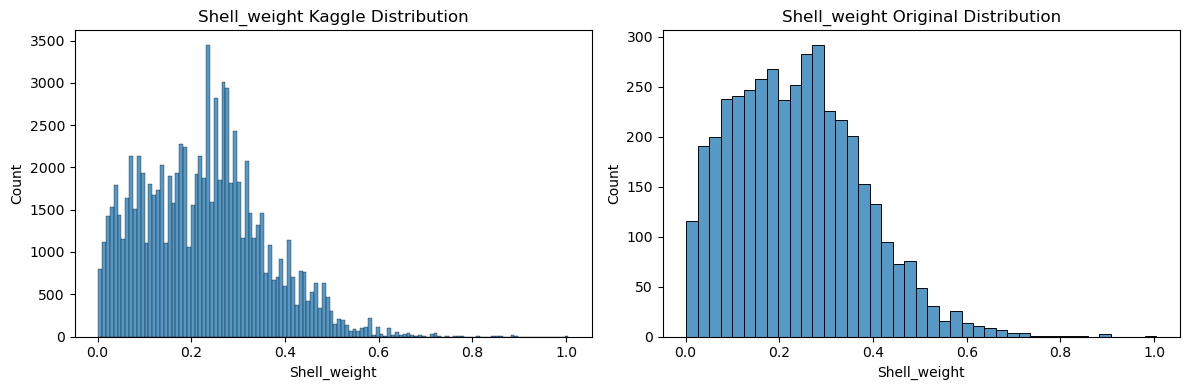

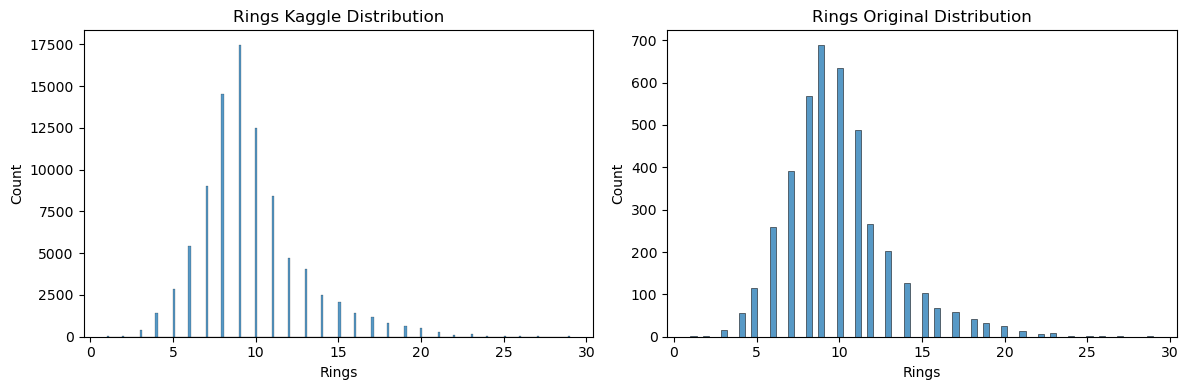

In [12]:
# select the columns to compare
features_ = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings']

for feature in features_:

    # Set up the figure and axis
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot histogram for training data
    sns.histplot(kaggle_df[feature], ax=axs[0])
    axs[0].set_title(f'{feature} Kaggle Distribution')

    # Plot histogram for training data
    sns.histplot(original_df[feature], ax=axs[1])
    axs[1].set_title(f'{feature} Original Distribution')

    # Adjust layout to prevent overlap
    plt.tight_layout()

Nothing seems particularly strange. Kaggle and original datasets have similar distributions

#### 3. Linear Correlation

In [13]:
corr_kaggle = kaggle_df.corr(method='pearson', numeric_only = True)
corr_kaggle.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole_weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Shucked_weight,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Viscera_weight,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell_weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


In [14]:
corr_original = original_df.corr(method='pearson', numeric_only = True)
corr_original.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [15]:
corr_diff = corr_kaggle - corr_original
corr_diff.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,0.000000,0.002920,0.088540,0.006187,0.011695,0.010117,0.013368,0.067066
Diameter,0.002920,0.000000,0.085934,0.008395,0.015303,0.014943,0.012542,0.062172
Height,0.088540,0.085934,0.000000,0.083123,0.086796,0.087812,0.086681,0.108304
Whole_weight,0.006187,0.008395,0.083123,0.000000,0.001843,0.007944,0.008845,0.076884
Shucked_weight,0.011695,0.015303,0.086796,0.001843,0.000000,0.017266,0.029183,0.094183
Viscera_weight,0.010117,0.014943,0.087812,0.007944,0.017266,0.000000,0.029413,0.085135
Shell_weight,0.013368,0.012542,0.086681,0.008845,0.029183,0.029413,0.000000,0.067192
Rings,0.067066,0.062172,0.108304,0.076884,0.094183,0.085135,0.067192,0.000000


The third correlatin matrix shows the difference in the correlations between the two datasets. All correlations are quite similar, with the most different being the **Height** and **Rings**

#### 4. Target-Feature Relationships

In [16]:
# For each number of rings, let's take the average measurement
kaggle_grouped = kaggle_df.groupby('Rings', as_index = False).mean(numeric_only = True)
original_grouped = original_df.groupby('Rings', as_index = False).mean(numeric_only = True)

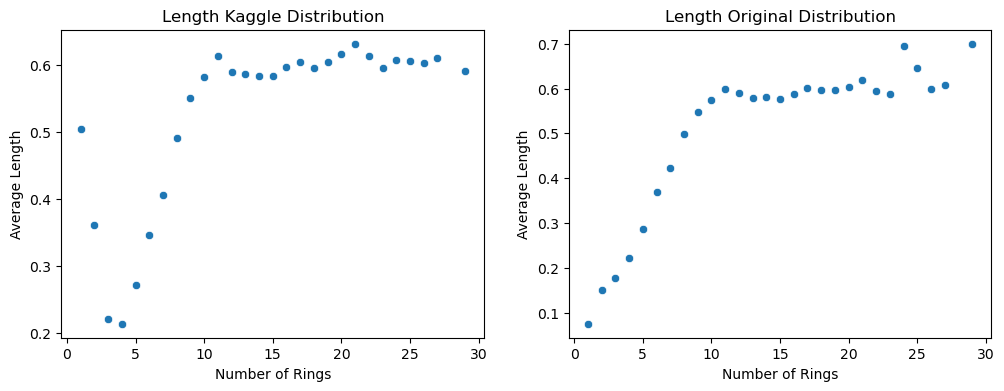

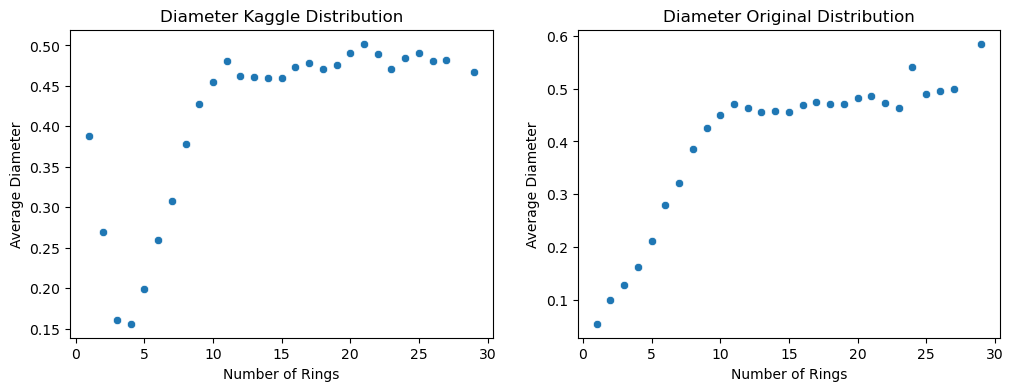

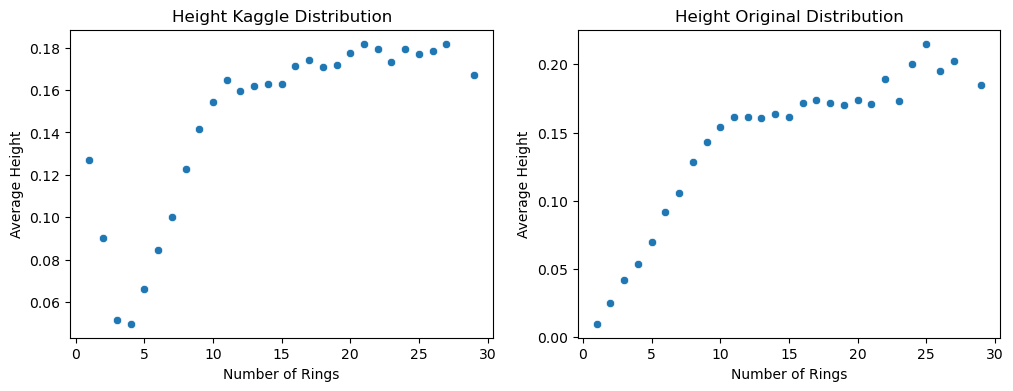

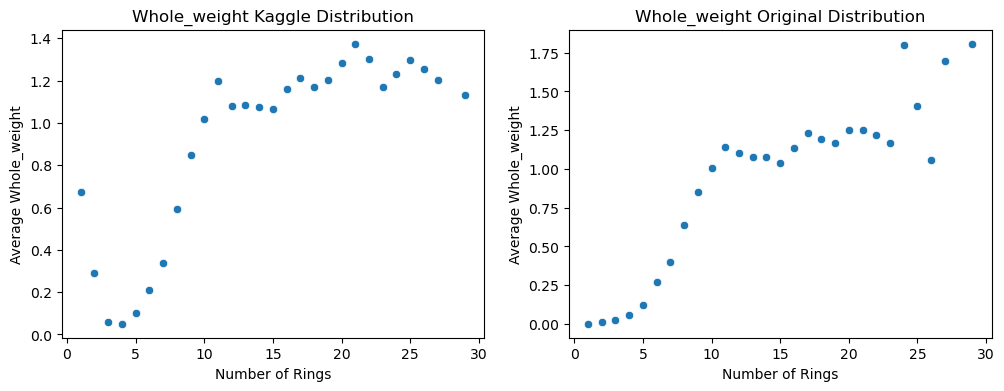

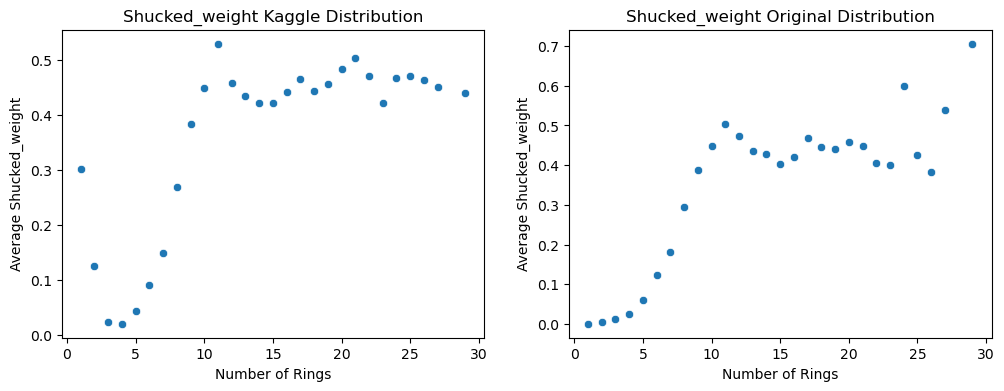

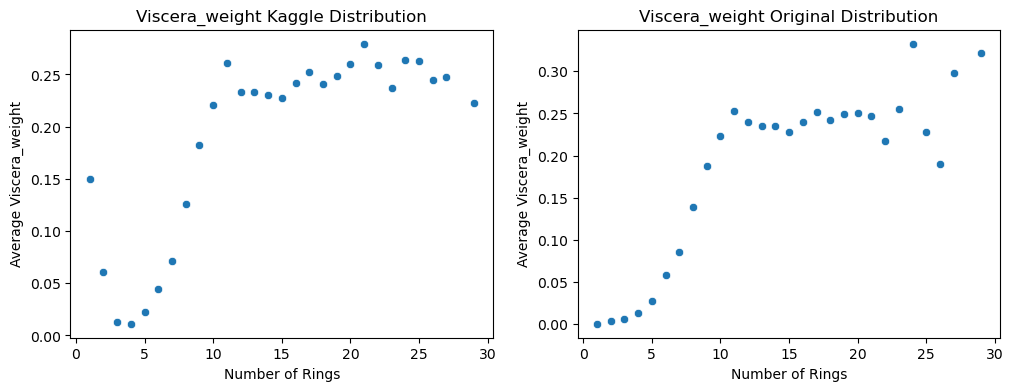

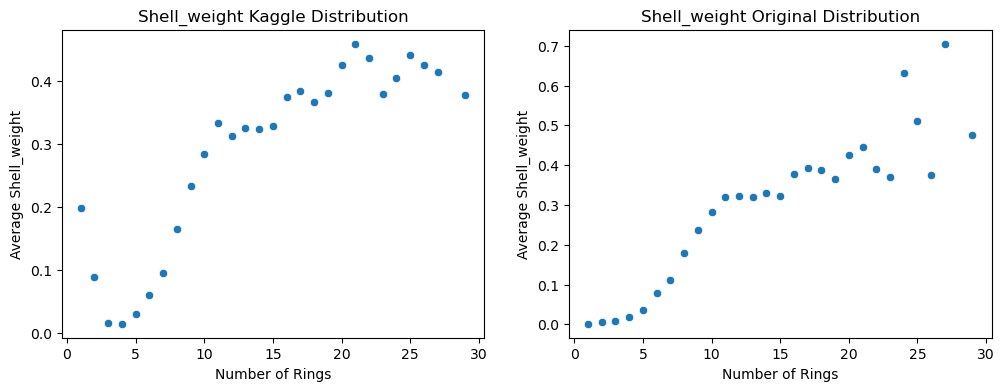

In [17]:
# select the columns to compare
features_ = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']

for feature in features_:
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.scatterplot(x="Rings", ax=axs[0], y=feature, data=kaggle_grouped)
    axs[0].set_title(f'{feature} Kaggle Distribution')
    axs[0].set_xlabel('Number of Rings')
    axs[0].set_ylabel(f'Average {feature}')
    
    sns.scatterplot(x="Rings", ax=axs[1], y=feature, data=original_grouped)
    axs[1].set_title(f'{feature} Original Distribution')
    axs[1].set_xlabel('Number of Rings')
    axs[1].set_ylabel(f'Average {feature}')

There is a quite different behavior with Rangs < 5. While the average measurement decreases (up to 5 Rings) in the kaggle dataset, this is not the case in the original.

#### 5. Feature difference between sexes

In [18]:
sex_grouped_kaggle = kaggle_df.groupby(['Sex','Rings'], as_index= False).median()
sex_grouped_original = original_df.groupby(['Sex','Rings'], as_index= False).median()

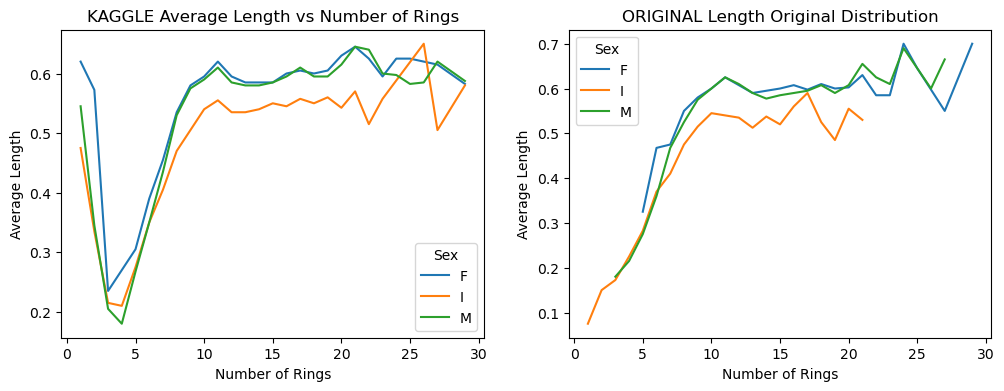

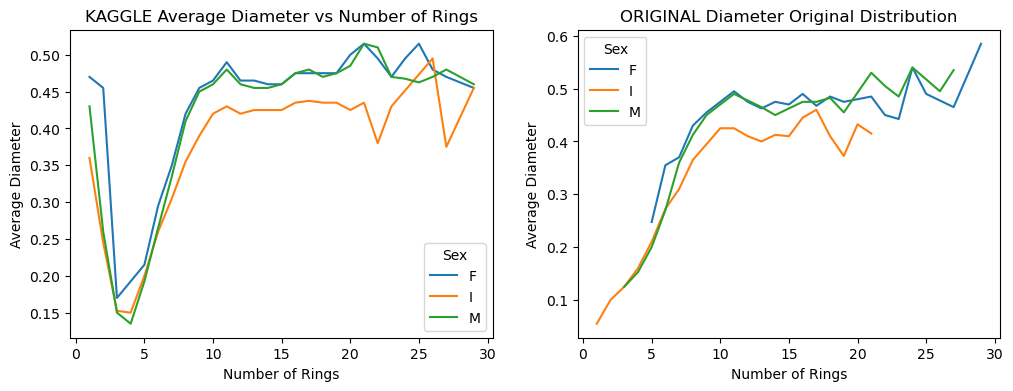

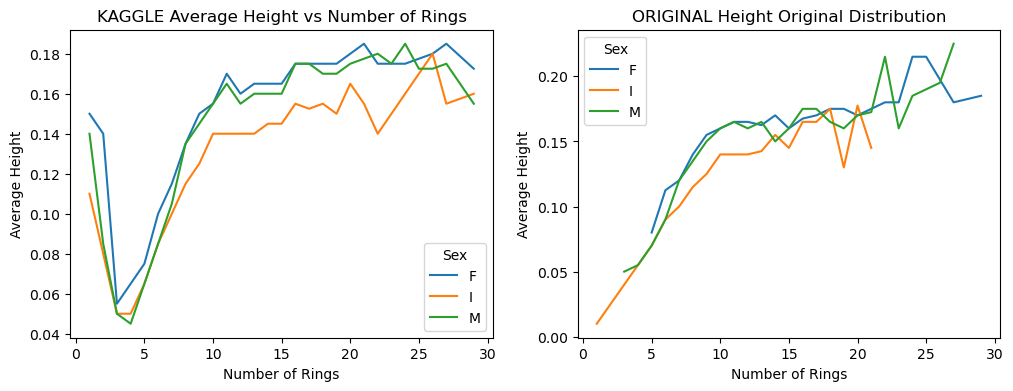

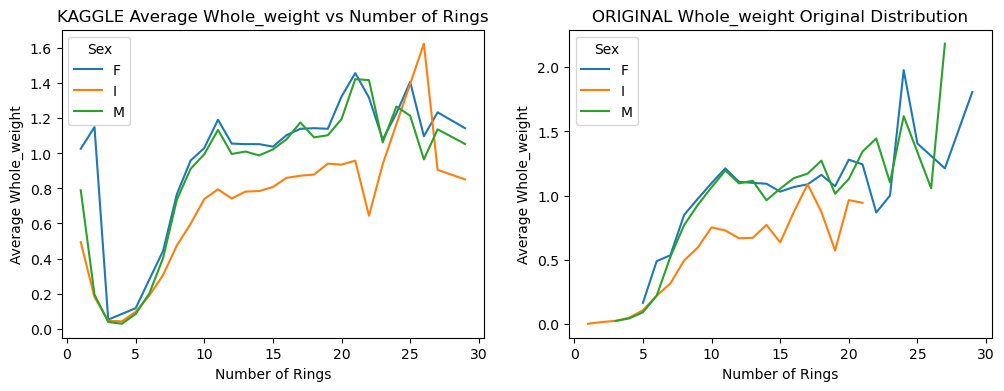

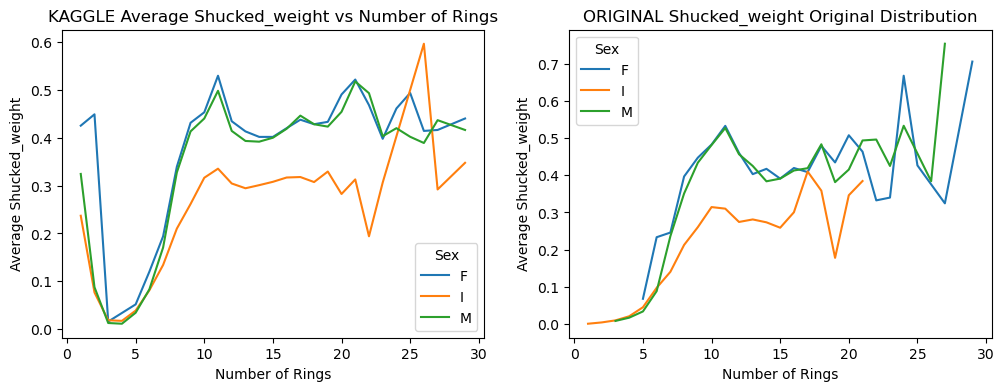

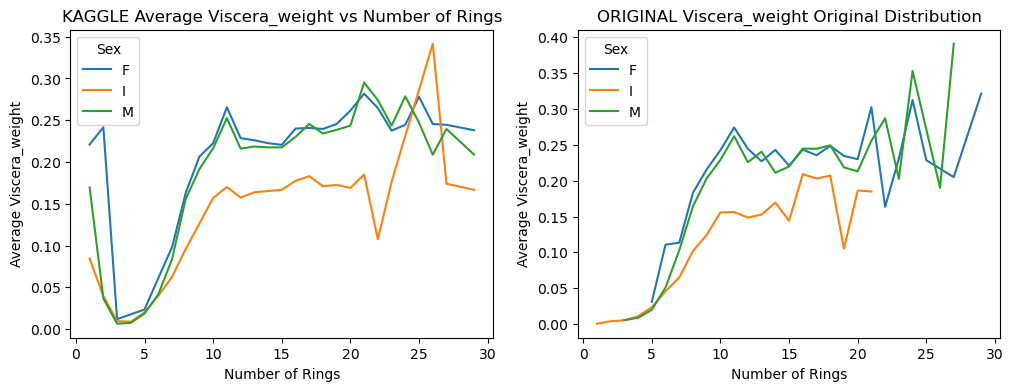

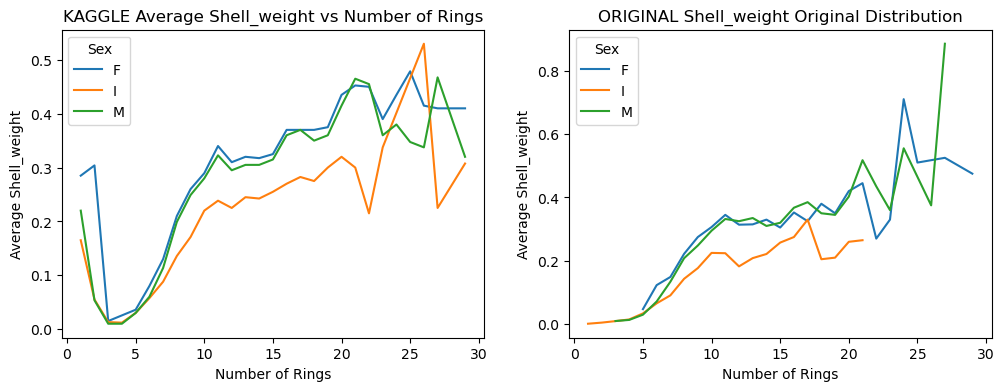

In [19]:
# select the columns to compare
features_ = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']

for feature in features_:
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.lineplot(x='Rings', ax=axs[0], y=feature, data=sex_grouped_kaggle, hue = 'Sex')
    axs[0].set_title(f'KAGGLE Average {feature} vs Number of Rings')
    axs[0].set_xlabel('Number of Rings')
    axs[0].set_ylabel(f'Average {feature}')
    
    sns.lineplot(x='Rings', ax=axs[1], y=feature, data=sex_grouped_original, hue = 'Sex')
    axs[1].set_title(f'ORIGINAL {feature} Original Distribution')
    axs[1].set_xlabel('Number of Rings')
    axs[1].set_ylabel(f'Average {feature}')

In [20]:
# minumum values per sex
original_df.groupby('Sex').min()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
F,0.275,0.195,0.015,0.0800,0.0310,0.0210,0.0250,5
I,0.075,0.055,0.000,0.0020,0.0010,0.0005,0.0015,1
M,0.155,0.110,0.025,0.0155,0.0065,0.0030,0.0050,3


In [21]:
# maximum values by sex
original_df.groupby('Sex').max()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
F,0.815,0.65,1.130,2.6570,1.4880,0.5900,1.005,29
I,0.725,0.55,0.220,2.0495,0.7735,0.4405,0.655,21
M,0.780,0.63,0.515,2.8255,1.3510,0.7600,0.897,27


The range of values per sex in the original dataset is more limited. For example, the minimum Rings number observed in females and males is 5 and 3, respectively (they are both 1 in the kaggle dataset). On the other hand the maximum number of Rings observed in Infants is 21 (it is 29 in the kaggle data set). In both datasets, however, infants are physically smaller than M and F at the same age.

#### 6. Targets Distribution

Text(0.5, 1.0, 'ORIGINAL Rings Distribution')

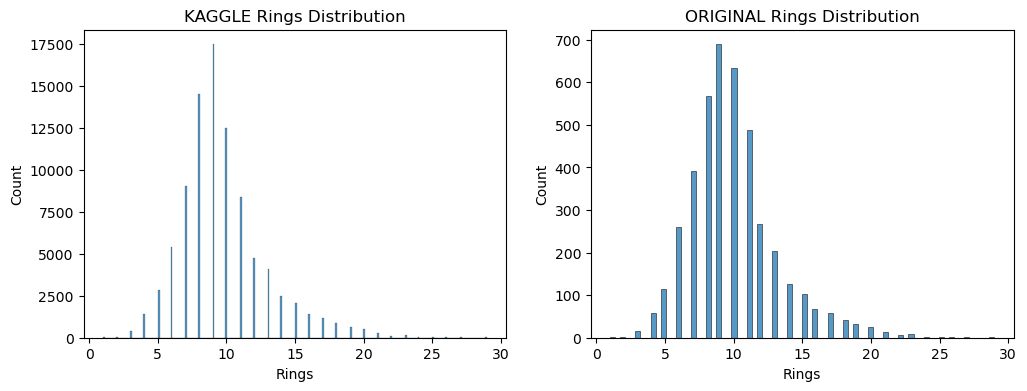

In [22]:
# Set up the figure and axis
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(kaggle_df['Rings'], ax=axs[0])
axs[0].set_title('KAGGLE Rings Distribution')

sns.histplot(original_df['Rings'], ax=axs[1])
axs[1].set_title('ORIGINAL Rings Distribution')

**The two datasets have similar distributions**

#### Target Distribution by Sex

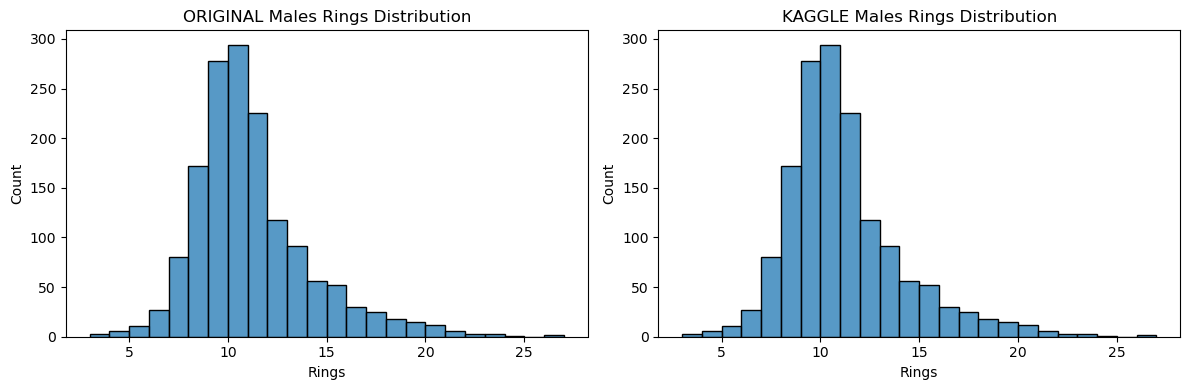

In [23]:
# Set up the figure and axis
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for training data
sns.histplot(original_df[original_df['Sex'] == 'M']["Rings"], ax=axs[0], binwidth=1)
axs[0].set_title('ORIGINAL Males Rings Distribution')

# Plot histogram for training data
sns.histplot(original_df[original_df['Sex'] == 'M']["Rings"], ax=axs[1], binwidth=1)
axs[1].set_title('KAGGLE Males Rings Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

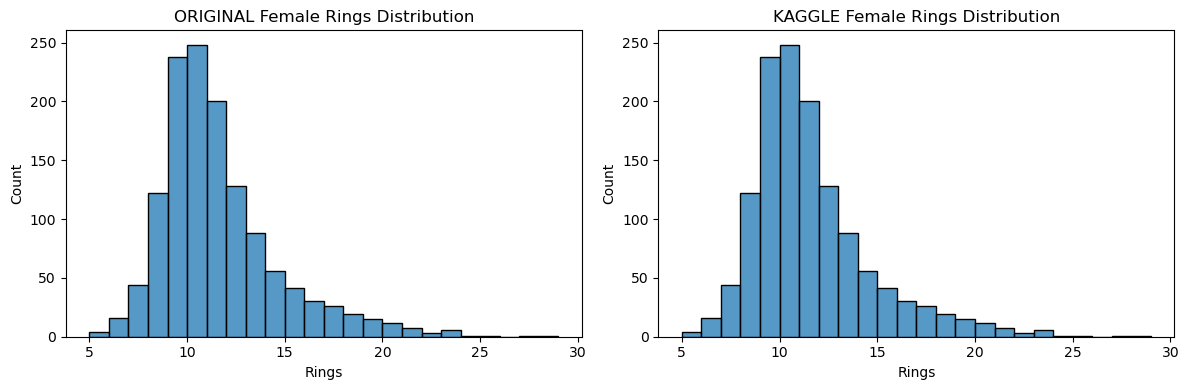

In [24]:
# Set up the figure and axis
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for training data
sns.histplot(original_df[original_df['Sex'] == 'F']["Rings"], ax=axs[0], binwidth=1)
axs[0].set_title('ORIGINAL Female Rings Distribution')

# Plot histogram for training data
sns.histplot(original_df[original_df['Sex'] == 'F']["Rings"], ax=axs[1], binwidth=1)
axs[1].set_title('KAGGLE Female Rings Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

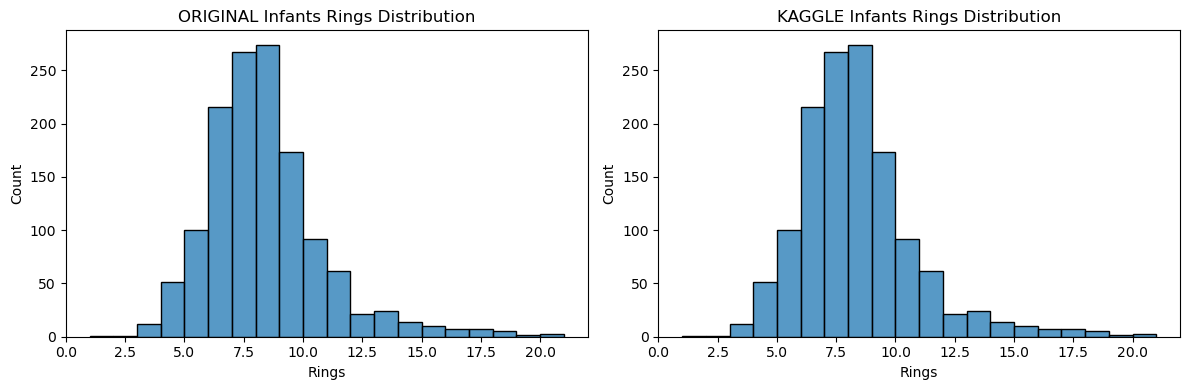

In [25]:
# Set up the figure and axis
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for training data
sns.histplot(original_df[original_df['Sex'] == 'I']["Rings"], ax=axs[0], binwidth=1)
axs[0].set_title('ORIGINAL Infants Rings Distribution')

# Plot histogram for training data
sns.histplot(original_df[original_df['Sex'] == 'I']["Rings"], ax=axs[1], binwidth=1)
axs[1].set_title('KAGGLE Infants Rings Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

The distributions of Rings by sex are very similar in the two datasets